In [2]:
#importing the downloaded libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load the dataset from device to the code
#dataset downloaded from kaagal:
#https://www.kaggle.com/datasets/heptapod/titanic
df = pd.read_csv('train.csv')
# Check the first few rows
print(df.head())

   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  \
0       0  ...        0        0        0       3        0        0       2.0   
1       0  ...        0        0        0       1        0        0       0.0   
2       0  ...        0        0        0       3        0        0       2.0   
3       0  ...        0        0        0       1        0        0       2.0   
4       0  ...        0        0        0       3        0        0       2.0   

   zero.17  zero.18  2urvived  
0        0        0         0 

In [6]:
#to understand the data in the dataset
#to check the structure and data types
print(df.info())
#to take summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64


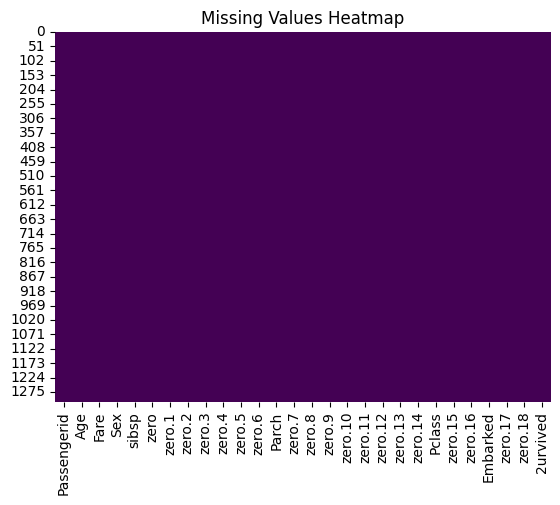

In [7]:
#to check for missing values
print(df.isnull().sum())

#to visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

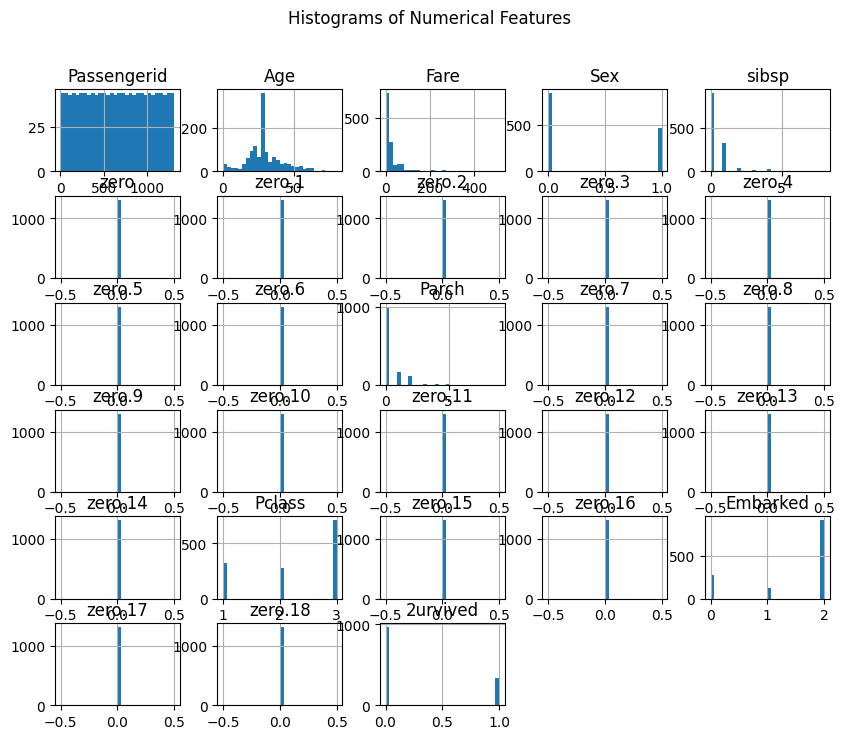

In [8]:
# Histograms for numerical features
df.hist(bins=30, figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

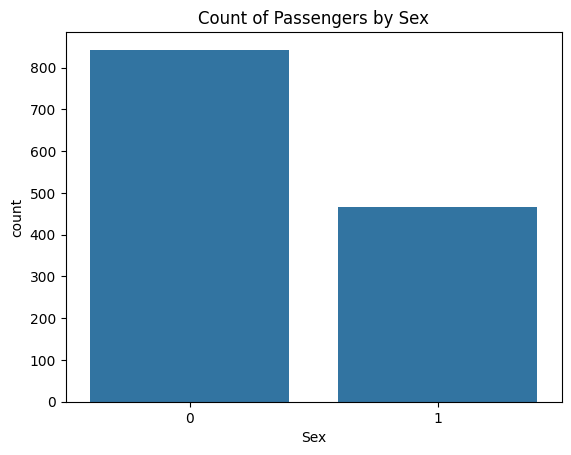

In [9]:
# Count plot for a categorical column (e.g., 'sex')
sns.countplot(x='Sex', data=df)
plt.title("Count of Passengers by Sex")
plt.show()

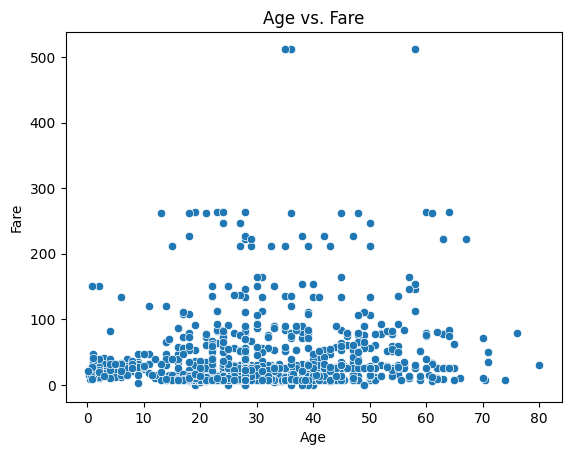

In [10]:
# Scatter plot between 'age' and 'fare'
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title("Age vs. Fare")
plt.show()

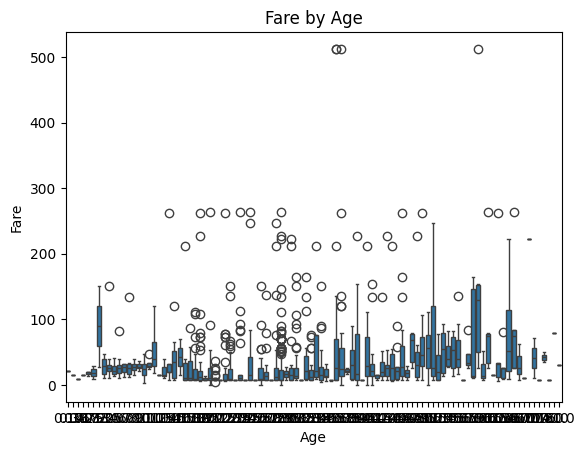

In [12]:
# Box plot for 'age' based on 'Fare'
sns.boxplot(x='Age', y='Fare', data=df)
plt.title("Fare by Age")
plt.show()

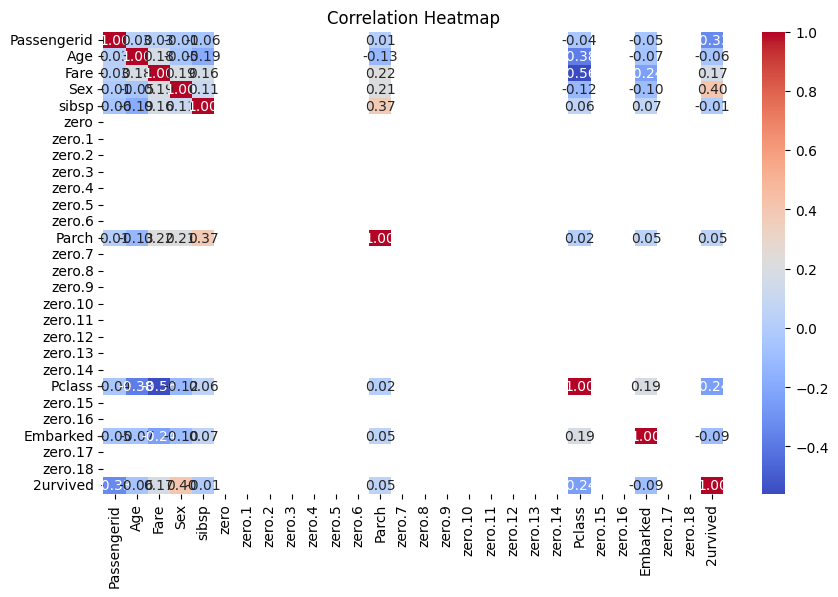

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

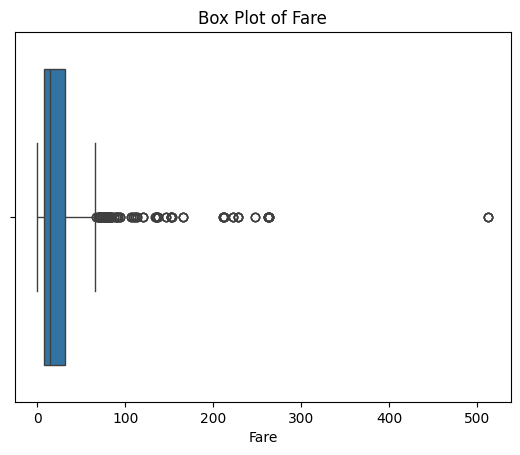

      Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
27             28  19.0  263.0000    0      3     0       0       0       0   
88             89  23.0  263.0000    1      3     0       0       0       0   
118           119  24.0  247.5208    0      0     0       0       0       0   
258           259  35.0  512.3292    1      0     0       0       0       0   
299           300  50.0  247.5208    1      0     0       0       0       0   
311           312  18.0  262.3750    1      2     0       0       0       0   
341           342  24.0  263.0000    1      3     0       0       0       0   
377           378  27.0  211.5000    0      0     0       0       0       0   
380           381  42.0  227.5250    1      0     0       0       0       0   
438           439  64.0  263.0000    0      1     0       0       0       0   
527           528  28.0  221.7792    0      0     0       0       0       0   
557           558  28.0  227.5250    0      0     0 

In [14]:
# Box plot for outliers
sns.boxplot(x=df['Fare'])
plt.title("Box Plot of Fare")
plt.show()

# Z-score to detect outliers
from scipy.stats import zscore
df['fare_zscore'] = zscore(df['Fare'])
outliers = df[np.abs(df['fare_zscore']) > 3]
print(outliers)

Age
0.17     20.575000
0.33     14.400000
0.42      8.516700
0.67     14.500000
0.75     17.430533
           ...    
70.50     7.750000
71.00    42.079200
74.00     7.775000
76.00    78.850000
80.00    30.000000
Name: Fare, Length: 98, dtype: float64


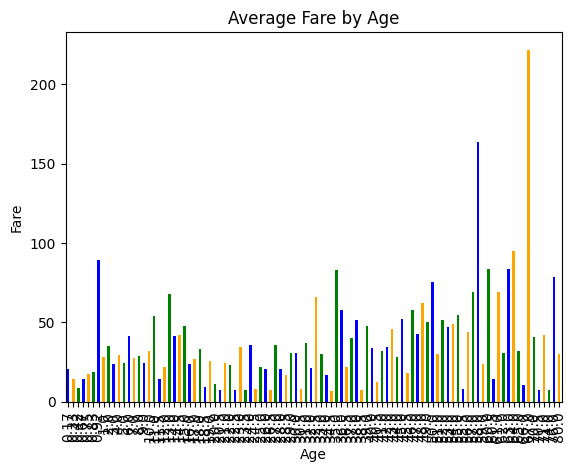

In [15]:
# Group by 'age' and calculate mean fare
age_fare = df.groupby('Age')['Fare'].mean()
print(age_fare)

# Bar plot for grouped data
age_fare.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Average Fare by Age")
plt.ylabel("Fare")
plt.show()

In [16]:
# Save cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)